In [ ]:
pip install -q tensorflow_data_validation

In [ ]:
pip install apache-beam

In [2]:
import pandas as pd
import numpy as np
import tensorflow_data_validation as tfdv
import apache_beam as beam

In [6]:
# Load the datasets
import pyarrow.parquet as pq
parquet_file_path = "/yellow_tripdata_2020-01.parquet"
table = pq.read_table(parquet_file_path)
csv_output_path = "/Jan2020_taxi.csv"
table.to_pandas().to_csv(csv_output_path, index=False)

In [7]:

parquet_file_path = "/yellow_tripdata_2020-03.parquet"
table = pq.read_table(parquet_file_path)
csv_output_path = "/Mar2020_taxi.csv"
table.to_pandas().to_csv(csv_output_path, index=False)


In [8]:
parquet_file_path = "/yellow_tripdata_2020-05.parquet"
table = pq.read_table(parquet_file_path)
csv_output_path = "/May2020_taxi.csv"
table.to_pandas().to_csv(csv_output_path, index=False)



In [3]:
Jan2020 = pd.read_csv('/Jan2020_taxi.csv')
Mar2020 = pd.read_csv('/Mar2020_taxi.csv')
May2020 = pd.read_csv('/May2020_taxi.csv')

<ipython-input-3-ae547639b43d>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Jan2020 = pd.read_csv('/Jan2020_taxi.csv')
<ipython-input-3-ae547639b43d>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Mar2020 = pd.read_csv('/Mar2020_taxi.csv')
<ipython-input-3-ae547639b43d>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  May2020 = pd.read_csv('/May2020_taxi.csv')


**RateCodeID**: The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride

**Store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip


**Payment_type**: A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip


**Fare_amount**: The time-and-distance fare calculated by the meter.

**Extra**: Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges.


**Tip Amount**: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.


**Congestion_Surcharge**: Total amount collected in trip for NYS congestion surcharge

**Total_amount**: The total amount charged to passengers

**Tolls amount**: Total amount of tolls paid in the trip

**Tips_amount**: This feild is automatically populated for credit card transactions

In [4]:
# Combine datasets for preprocessing
combined_data = pd.concat([Mar2020, May2020], ignore_index=True)

In [5]:
print(f"This Dataset have {combined_data.shape[0]} rows and {combined_data.shape[1]} columns.")

This Dataset have 3356102 rows and 19 columns.


In [6]:
combined_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.356102e+06,3.259393e+06,3.356102e+06,3.259393e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.356102e+06,3.259393e+06,0.0
mean,1.667640e+00,1.453859e+00,3.658543e+00,1.050638e+00,1.623053e+02,1.596411e+02,1.244626e+00,1.293062e+01,1.216658e+00,6.406087e-01,2.064802e+00,3.178832e-01,2.975405e-01,1.892838e+01,2.247827e+00,NaN
std,4.742970e-01,1.109531e+00,3.173301e+02,7.375650e-01,6.712467e+01,7.127640e+01,5.246824e-01,4.350775e+02,2.729334e+02,2.729307e+02,2.706952e+00,1.642071e+00,3.747866e-02,6.980848e+02,7.770240e-01,NaN
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00,NaN
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01,2.500000e+00,NaN
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,NaN
75%,2.000000e+00,1.000000e+00,3.120000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.800000e+00,0.000000e+00,3.000000e-01,2.015000e+01,2.500000e+00,NaN
max,6.000000e+00,9.000000e+00,2.970045e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00,NaN


In [7]:
combined_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
combined_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN


In [9]:
combined_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3356097,2,2020-05-31 23:49:40,2020-06-01 00:24:13,NaN,17.08,NaN,NaN,202,89,0,41.99,0.0,0.5,0.0,6.12,0.3,51.41,NaN,NaN
3356098,2,2020-05-31 23:05:22,2020-05-31 23:31:21,NaN,15.09,NaN,NaN,137,218,0,39.56,0.0,0.5,0.0,6.12,0.3,48.98,NaN,NaN
3356099,2,2020-05-31 23:12:51,2020-05-31 23:27:52,NaN,2.36,NaN,NaN,82,56,0,6.73,0.0,0.5,0.0,0.00,0.3,7.53,NaN,NaN
3356100,2,2020-05-31 23:32:00,2020-05-31 23:38:00,NaN,1.14,NaN,NaN,137,162,0,5.93,0.0,0.5,0.0,0.00,0.3,9.23,NaN,NaN
3356101,2,2020-05-31 23:00:00,2020-05-31 23:26:00,NaN,14.14,NaN,NaN,82,254,0,37.31,0.0,0.5,0.0,6.12,0.3,44.23,NaN,NaN


In [10]:
# Task 1: Data Preparation
# Check for missing, null, NaN records
missing_data = combined_data.isnull().sum()


In [11]:
missing_data

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            96709
trip_distance                  0
RatecodeID                 96709
store_and_fwd_flag         96709
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       96709
airport_fee              3356102
dtype: int64

In [12]:
combined_data['passenger_count'].mean()

1.453859353566753

In [13]:
PassCountMedian = combined_data['passenger_count'].median()

In [14]:
PassCountMedian

1.0

In [15]:
combined_data['passenger_count'].fillna(PassCountMedian, inplace=True)

In [16]:
combined_data['RatecodeID'].mean()

1.050638263014003

In [17]:
most_frequent_value = 'N'
combined_data['store_and_fwd_flag'].fillna(most_frequent_value, inplace=True)

In [18]:
combined_data['congestion_surcharge'].mean()

2.2478272794965197

In [19]:
ConSurchargeMedian = combined_data['congestion_surcharge'].median()

In [20]:
combined_data['congestion_surcharge'].fillna(ConSurchargeMedian, inplace=True)

In [21]:
  # Drop the column
combined_data.drop('airport_fee', axis=1, inplace=True)



In [23]:
combined_data.drop('RatecodeID', axis=1, inplace=True)

In [24]:
combined_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [25]:
# Find outliers
Q1 = combined_data['fare_amount'].quantile(0.25)
Q3 = combined_data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = combined_data[(combined_data['fare_amount'] < (Q1 - 1.5 * IQR)) | (combined_data['fare_amount'] > (Q3 + 1.5 * IQR))]

In [26]:
outliers

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6,1,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.10,Y,237,14,1,40.50,3.0,0.5,8.85,0.00,0.3,53.15,2.5
51,2,2020-03-01 00:49:15,2020-03-01 01:27:47,1.0,9.82,N,100,71,1,33.00,0.5,0.5,0.00,0.00,0.3,36.80,2.5
54,2,2020-03-01 00:44:45,2020-03-01 01:21:57,1.0,8.21,N,68,48,1,29.00,0.5,0.5,6.56,0.00,0.3,39.36,2.5
99,2,2020-03-01 00:23:23,2020-03-01 00:55:06,1.0,17.36,N,132,230,2,52.00,0.0,0.5,0.00,6.12,0.3,61.42,2.5
118,2,2020-03-01 00:06:11,2020-03-01 00:31:17,1.0,10.11,N,132,198,1,30.00,0.5,0.5,6.26,0.00,0.3,37.56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356094,2,2020-05-31 23:29:41,2020-05-31 23:48:24,1.0,10.62,N,137,182,0,29.41,0.0,0.5,0.00,6.12,0.3,38.83,2.5
3356095,2,2020-05-31 23:08:28,2020-05-31 23:23:07,1.0,9.43,N,227,4,0,29.65,0.0,0.5,0.00,0.00,0.3,32.95,2.5
3356097,2,2020-05-31 23:49:40,2020-06-01 00:24:13,1.0,17.08,N,202,89,0,41.99,0.0,0.5,0.00,6.12,0.3,51.41,2.5
3356098,2,2020-05-31 23:05:22,2020-05-31 23:31:21,1.0,15.09,N,137,218,0,39.56,0.0,0.5,0.00,6.12,0.3,48.98,2.5


In [27]:
# Transform data - all entries should be numeric
combined_data_numeric = combined_data.apply(pd.to_numeric, errors='coerce')


In [28]:
#Task 2: List all types of data
#Datatypes after transformation
data_types = combined_data_numeric.dtypes
data_types


VendorID                   int64
tpep_pickup_datetime     float64
tpep_dropoff_datetime    float64
passenger_count          float64
trip_distance            float64
store_and_fwd_flag       float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [29]:
#Split the two datasets
total_samples = len(Mar2020) + len(May2020)
train_size = len(Mar2020) / total_samples

In [30]:
# Install the required module
!pip install scikit-learn


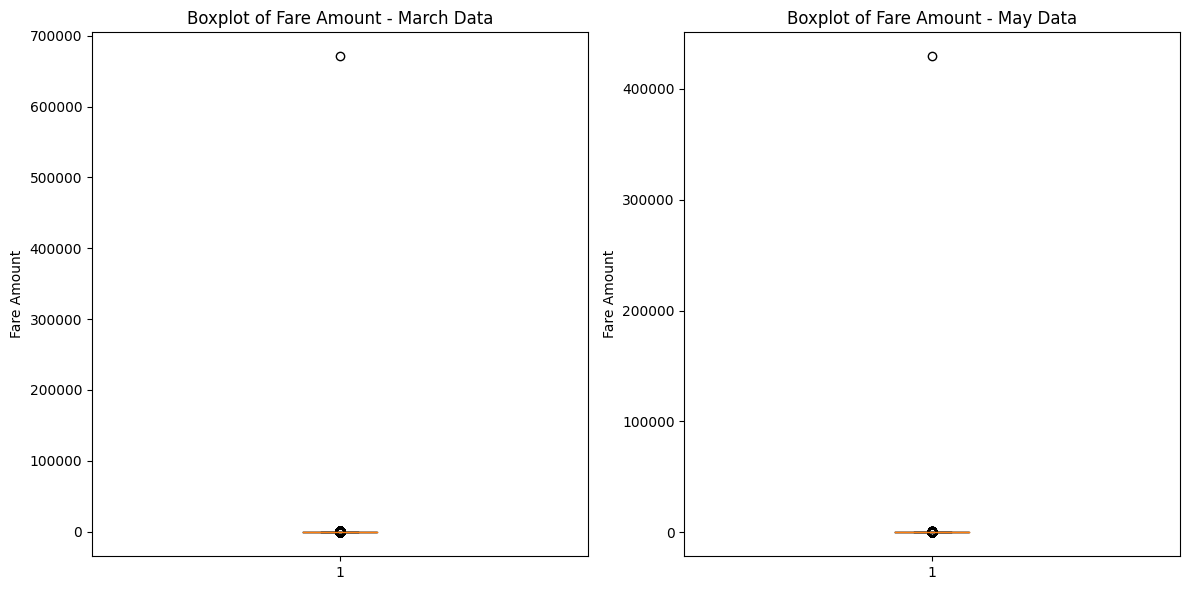

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(Mar2020['fare_amount'])
plt.title('Boxplot of Fare Amount - March Data')
plt.ylabel('Fare Amount')

plt.subplot(1, 2, 2)
plt.boxplot(May2020['fare_amount'])
plt.title('Boxplot of Fare Amount - May Data')
plt.ylabel('Fare Amount')

plt.tight_layout()
plt.show()


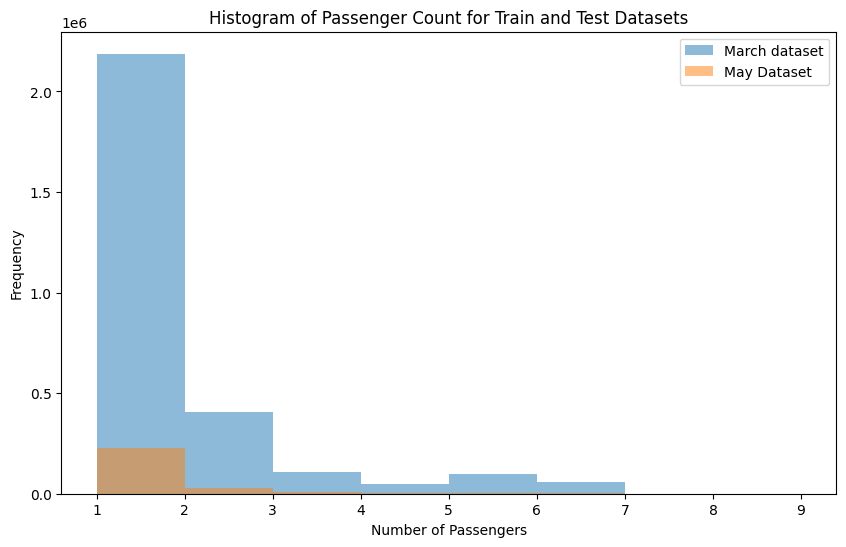

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(Mar2020['passenger_count'], bins=range(1, 10), alpha=0.5, label='March dataset')
plt.hist(May2020['passenger_count'], bins=range(1, 10), alpha=0.5, label='May Dataset')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Histogram of Passenger Count for Train and Test Datasets')
plt.legend()
plt.show()


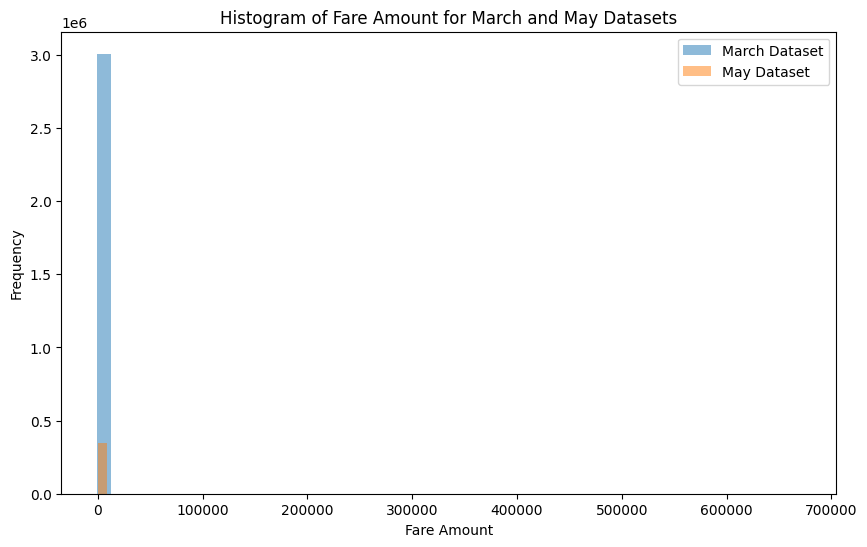

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(Mar2020['fare_amount'], bins=50, alpha=0.5, label='March Dataset')
plt.hist(May2020['fare_amount'], bins=50, alpha=0.5, label='May Dataset')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Fare Amount for March and May Datasets')
plt.legend()
plt.show()


In [43]:
# Extracting date part from the datetime column
Mar2020['pickup_date'] = pd.to_datetime(Mar2020['tpep_pickup_datetime']).dt.date
May2020['pickup_date'] = pd.to_datetime(May2020['tpep_pickup_datetime']).dt.date



In [45]:
# Counting the number of trips per day
Mar_trip_count = Mar2020.groupby('pickup_date').size()
May_trip_count = May2020.groupby('pickup_date').size()

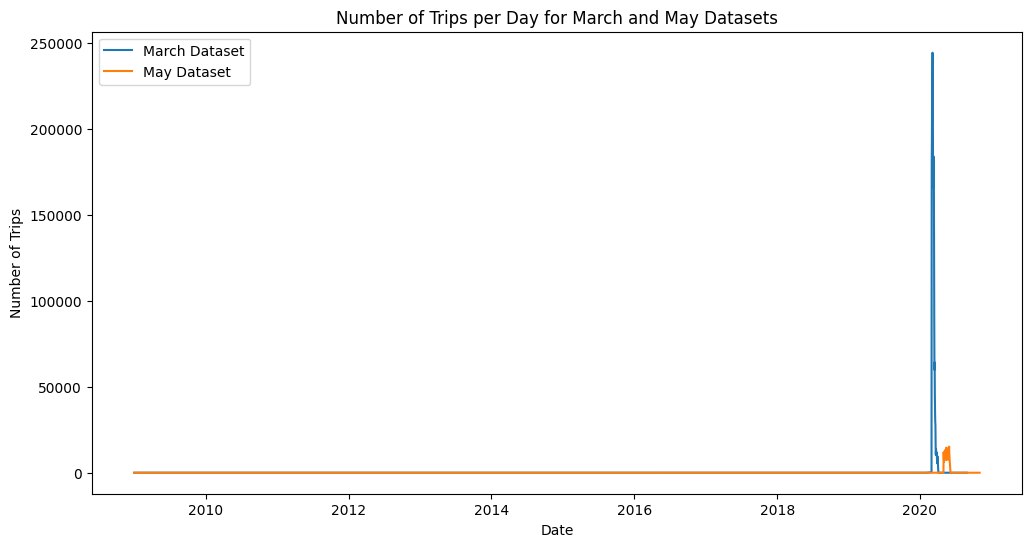

In [46]:
# Creating line plots
plt.figure(figsize=(12, 6))
plt.plot(Mar_trip_count.index, train_trip_count.values, label='March Dataset')
plt.plot(May_trip_count.index, eval_trip_count.values, label='May Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day for March and May Datasets')
plt.legend()
plt.show()

In [35]:
import seaborn as sns

<ipython-input-36-d5d6e2d180b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Mar2020.corr()


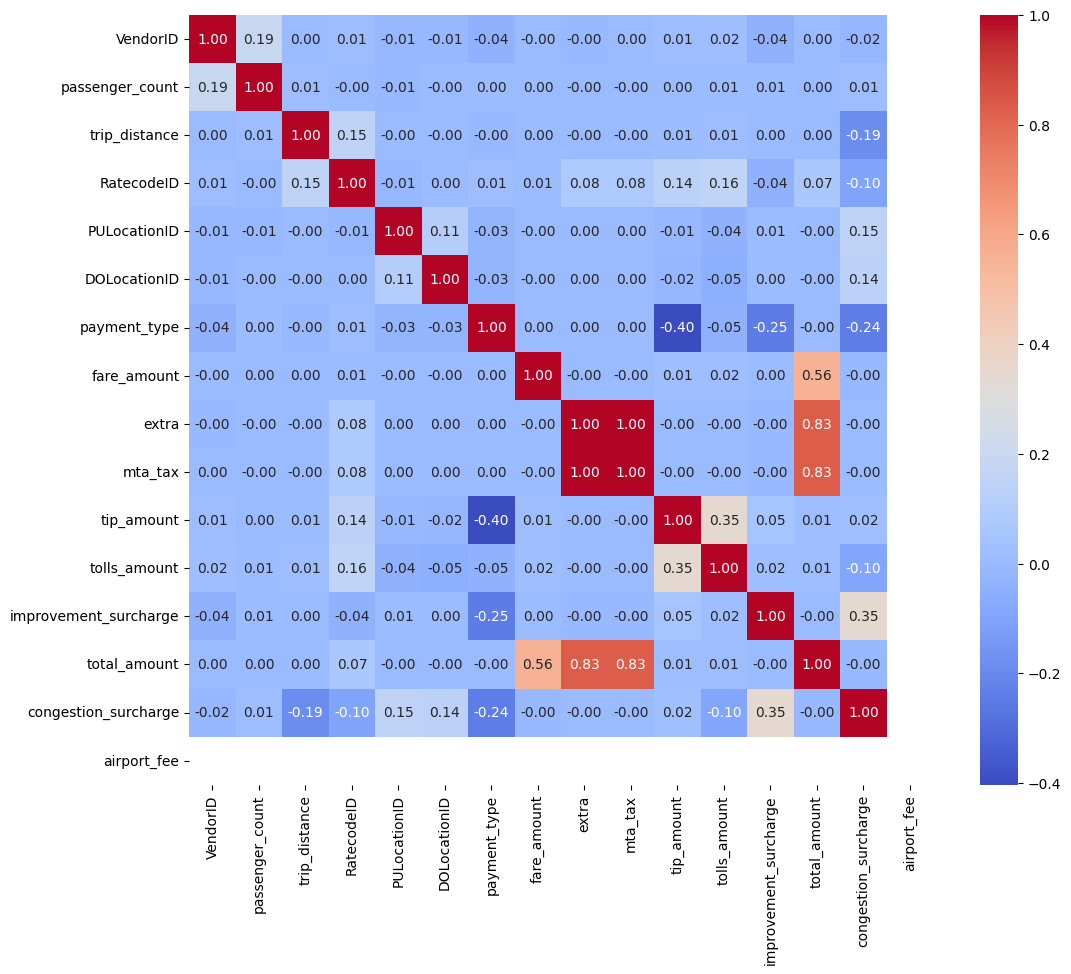

In [36]:
# Calculate correlation matrix

correlation_matrix = Mar2020.corr()

# Plot correlation matrix with larger figure size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.show()

In [52]:
!pip install pyarrow

In [57]:
# Convert the date32[day] column to a supported type
Mar2020['tpep_pickup_datetime'] = pd.to_datetime(Mar2020['tpep_pickup_datetime'])
May2020['tpep_pickup_datetime'] = pd.to_datetime(May2020['tpep_pickup_datetime'])
Mar2020['tpep_dropoff_datetime'] = pd.to_datetime(Mar2020['tpep_pickup_datetime'])
May2020['tpep_dropoff_datetime'] = pd.to_datetime(May2020['tpep_pickup_datetime'])


In [37]:
#Perform EDA utilizing the TFDV
#Analyze the dataset
# Generate the statistics
March_stats = tfdv.generate_statistics_from_dataframe(Mar2020)
May_stats = tfdv.generate_statistics_from_dataframe(May2020)

In [39]:
#Visualize the statistics
tfdv.visualize_statistics(March_stats)


In [40]:
#Visualize the statistics
tfdv.visualize_statistics(May_stats)

In [41]:
# Compare train_stats and test_stats
train_test_diff = tfdv.visualize_statistics(lhs_statistics=March_stats, rhs_statistics=May_stats)

In [43]:
#Generate a schema
schema = tfdv.infer_schema(statistics=March_stats)

In [44]:
!pip install schema

In [45]:
schema

feature {
  name: "VendorID"
  type: INT
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "tpep_pickup_datetime"
  type: BYTES
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "tpep_dropoff_datetime"
  type: BYTES
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "passenger_count"
  value_count {
    min: 1
    max: 1
  }
  type: FLOAT
  presence {
    min_count: 1
  }
}
feature {
  name: "trip_distance"
  type: FLOAT
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "RatecodeID"
  value_count {
    min: 1
    max: 1
  }
  type: FLOAT
  presence {
    min_count: 1
  }
}
feature {
  name: "store_and_fwd_flag"
  value_count {
    min: 1
    max: 1
  }
  type: BYTES
  domain: "store_and_fwd_flag"
  presence {
  

In [46]:
# List the most important variables affecting the target label
# Example: Using correlation coefficients
# Present dependencies and correlations
#The resulting correlation_matrix is a square matrix where each entry represents the correlation coefficient between two columns. The correlation coefficient ranges from -1 to 1:
correlation_matrix = Mar2020.corr()
correlation_matrix
target_correlation = correlation_matrix['total_amount'].abs().sort_values(ascending=False)

<ipython-input-46-2dfa26853ffd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Mar2020.corr()


In [47]:
target_correlation

total_amount             1.000000
mta_tax                  0.830181
extra                    0.830175
fare_amount              0.557455
RatecodeID               0.071179
tip_amount               0.012373
tolls_amount             0.012192
congestion_surcharge     0.003229
DOLocationID             0.001303
PULocationID             0.001027
improvement_surcharge    0.000945
payment_type             0.000659
passenger_count          0.000423
VendorID                 0.000330
trip_distance            0.000313
airport_fee                   NaN
Name: total_amount, dtype: float64

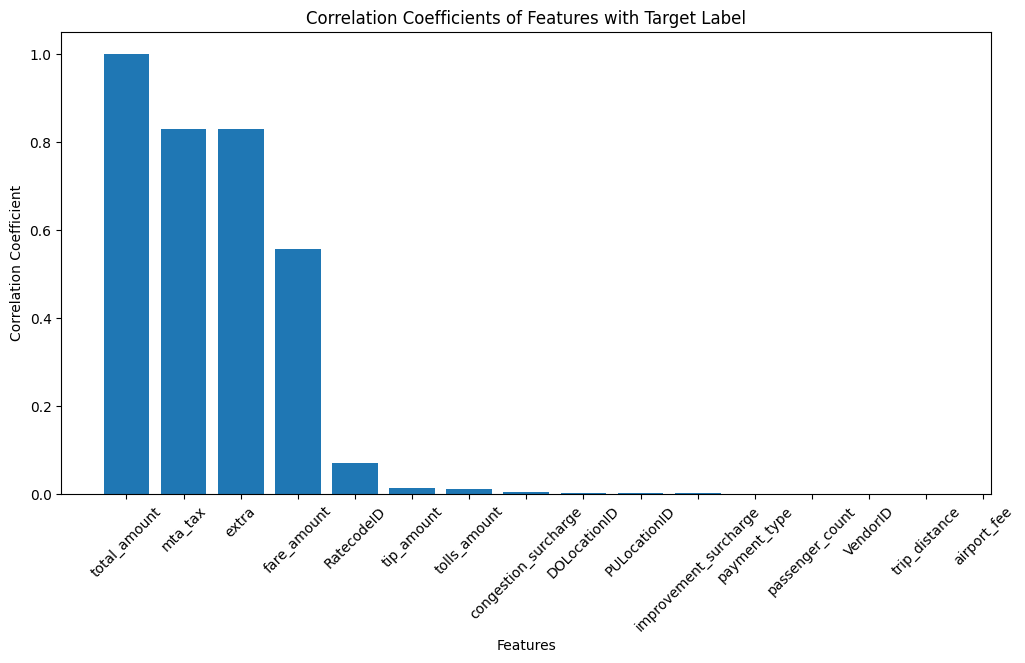

In [48]:

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(target_correlation.index, target_correlation.values)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients of Features with Target Label')
plt.xticks(rotation=45)
plt.show()

In [49]:
Jan2020 = Jan2020.drop(columns=['airport_fee'])

In [50]:
print(f"This Dataset have {Jan2020.shape[0]} rows and {Jan2020.shape[1]} columns.")

This Dataset have 6405008 rows and 18 columns.


In [51]:
Jan2020.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [52]:
# Task 1: Data Preparation
# Check for missing, null, NaN records
Jan2020.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     65441
dtype: int64

In [53]:
PassCountMedian = Jan2020['passenger_count'].median()
PassCountMedian

1.0

In [54]:
Jan2020['passenger_count'].fillna(PassCountMedian, inplace=True)

In [55]:
Jan2020 = Jan2020.drop(columns=['store_and_fwd_flag'])

In [56]:
Jan2020 = Jan2020.drop(columns=['RatecodeID'])

In [57]:
ConSurchargeMedian_Mar = Jan2020['congestion_surcharge'].median()
ConSurchargeMedian_Mar

2.5

In [58]:
Jan2020['congestion_surcharge'].fillna(ConSurchargeMedian, inplace=True)

In [59]:
Jan2020['tpep_pickup_datetime'] = pd.to_datetime(Jan2020['tpep_pickup_datetime'])
Jan2020['tpep_dropoff_datetime'] = pd.to_datetime(Jan2020['tpep_dropoff_datetime'])


In [60]:
Jan2020['trip_duration'] = Jan2020['tpep_dropoff_datetime'] - Jan2020['tpep_pickup_datetime']

In [61]:
Jan2020['trip_duration']

0         0 days 00:04:48
1         0 days 00:07:25
2         0 days 00:06:11
3         0 days 00:04:51
4         0 days 00:02:18
                ...      
6405003   0 days 00:26:00
6405004   0 days 00:44:00
6405005   0 days 00:25:00
6405006   0 days 00:24:16
6405007   0 days 00:19:58
Name: trip_duration, Length: 6405008, dtype: timedelta64[ns]

In [62]:
import matplotlib.pyplot as plt


january_trip_count = Jan2020.shape[0]
march_trip_count = Mar2020.shape[0]
print("Total Number of Trips:")
print("January 2020:", january_trip_count)
print("March 2020:", march_trip_count)
print("Percentage Change:", ((march_trip_count - january_trip_count) / january_trip_count) * 100)

Total Number of Trips:
January 2020: 6405008
March 2020: 3007687
Percentage Change: -53.0416355451859


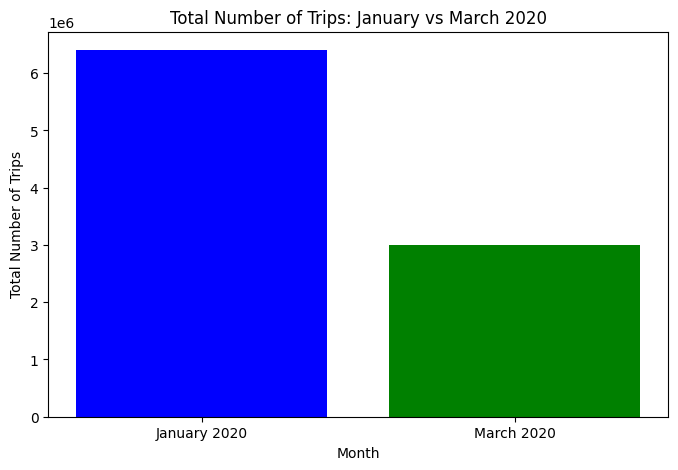

In [63]:
plt.figure(figsize=(8, 5))
plt.bar(['January 2020', 'March 2020'], [january_trip_count, march_trip_count], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Total Number of Trips')
plt.title('Total Number of Trips: January vs March 2020')
plt.show()

In [64]:
january_avg_distance = Jan2020['trip_distance'].mean()
march_avg_distance = Mar2020['trip_distance'].mean()
print("\nAverage Trip Distance:")
print("January 2020:", january_avg_distance)
print("March 2020:", march_avg_distance)
print("Percentage Change:", ((march_avg_distance - january_avg_distance) / january_avg_distance) * 100)



Average Trip Distance:
January 2020: 2.929643933309688
March 2020: 3.1170405264909533
Percentage Change: 6.39656550240079


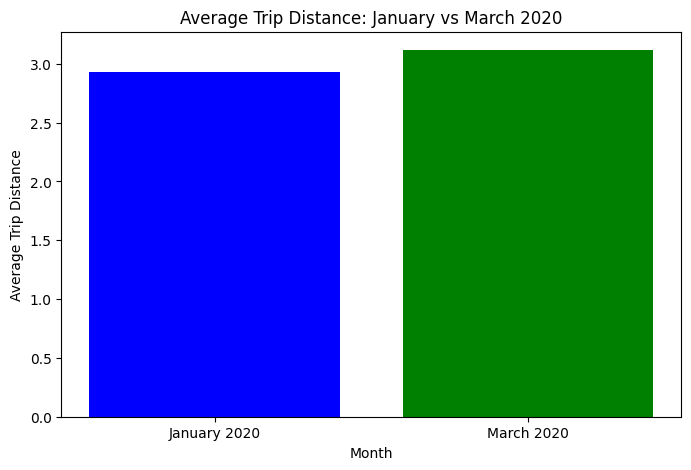

In [66]:
plt.figure(figsize=(8, 5))
plt.bar(['January 2020', 'March 2020'], [january_avg_distance, march_avg_distance], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance: January vs March 2020')
plt.show()

In [67]:
january_avg_fare = Jan2020['fare_amount'].mean()
march_avg_fare = Mar2020['fare_amount'].mean()
print("\nAverage Fare Amount:")
print("January 2020:", january_avg_fare)
print("March 2020:", march_avg_fare)
print("Percentage Change:", ((march_avg_fare - january_avg_fare) / january_avg_fare) * 100)



Average Fare Amount:
January 2020: 12.694108119771293
March 2020: 12.69764294622412
Percentage Change: 0.027846197775177047


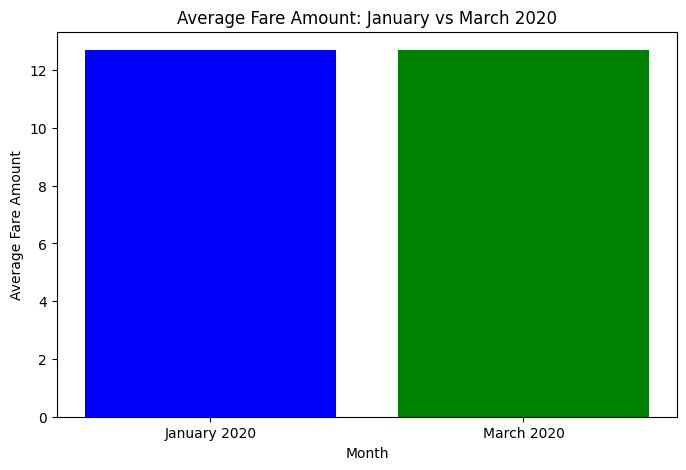

In [68]:
plt.figure(figsize=(8, 5))
plt.bar(['January 2020', 'March 2020'], [january_avg_fare, march_avg_fare], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount: January vs March 2020')
plt.show()

In [71]:
# Factor 5: Trip duration distribution
Mar2020['tpep_pickup_datetime'] = pd.to_datetime(Mar2020['tpep_pickup_datetime'])
Mar2020['tpep_dropoff_datetime'] = pd.to_datetime(Mar2020['tpep_dropoff_datetime'])
Mar2020['trip_duration'] = Mar2020['tpep_dropoff_datetime'] - Mar2020['tpep_pickup_datetime']
january_trip_duration = Jan2020['trip_duration'].dt.total_seconds()/60
march_trip_duration = Mar2020['trip_duration'].dt.total_seconds()/60

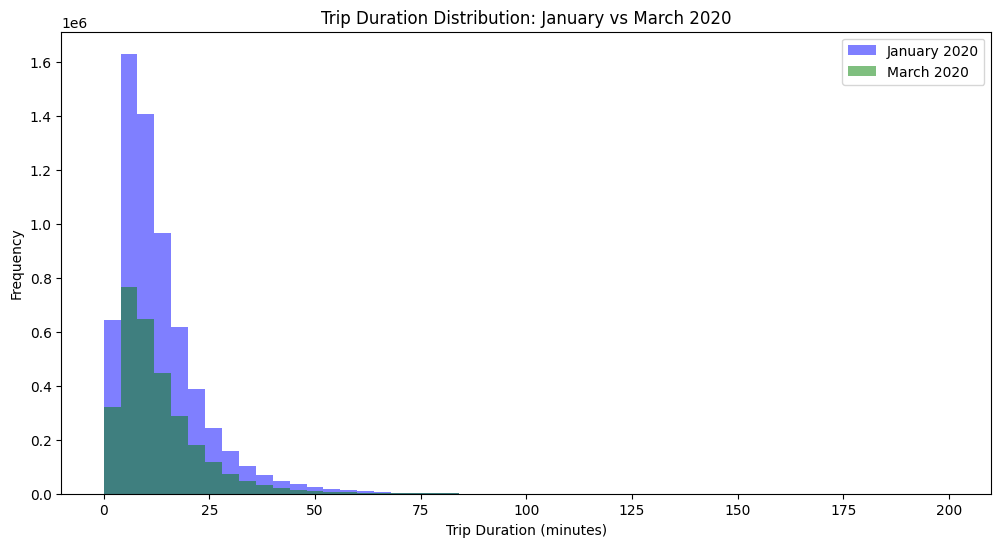

In [72]:
plt.figure(figsize=(12, 6))
plt.hist(january_trip_duration, bins=50, alpha=0.5, label='January 2020', color='blue',range=(0, 200))
plt.hist(march_trip_duration, bins=50, alpha=0.5, label='March 2020', color='green',range=(0, 200))
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trip Duration Distribution: January vs March 2020')
plt.legend()
plt.show()

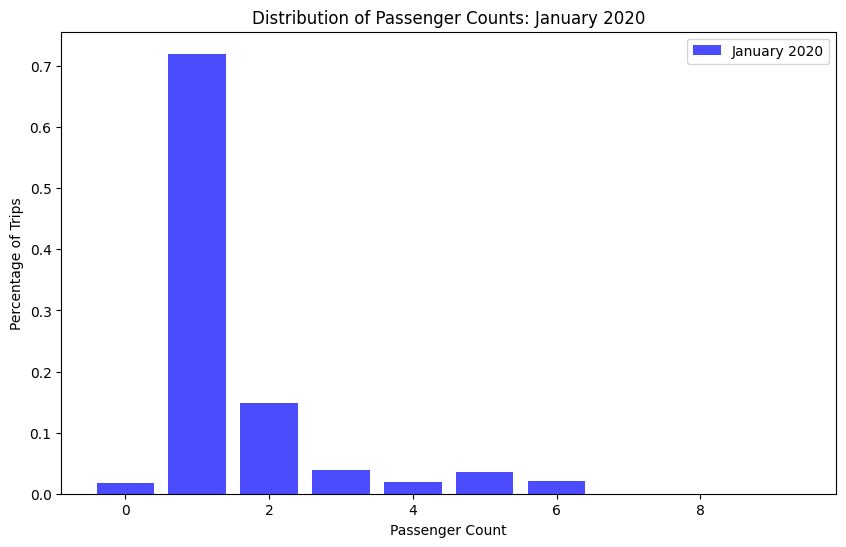

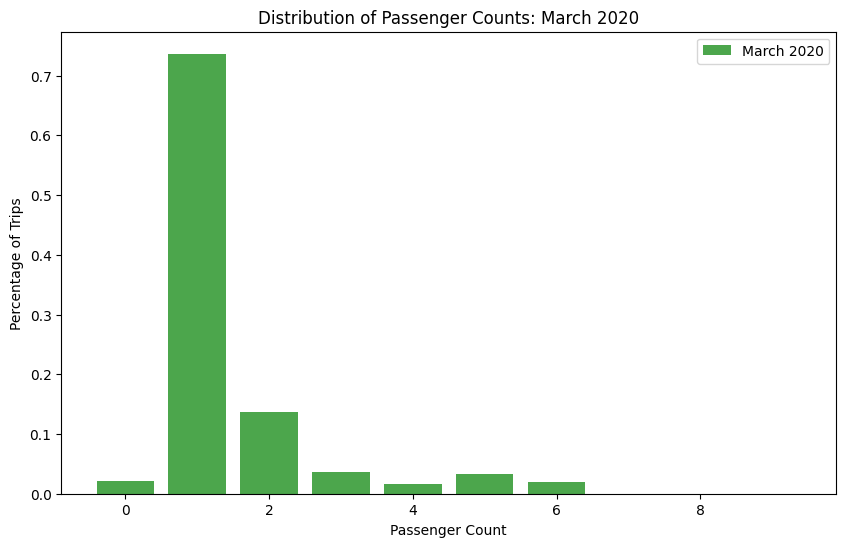

In [73]:
# Distribution of passenger counts
january_passenger_counts = Jan2020['passenger_count'].value_counts(normalize=True)
march_passenger_counts = Mar2020['passenger_count'].value_counts(normalize=True)

# Plotting bar chart for distribution of passenger counts in January 2020
plt.figure(figsize=(10, 6))
plt.bar(january_passenger_counts.index, january_passenger_counts.values, color='blue', alpha=0.7, label='January 2020')
plt.xlabel('Passenger Count')
plt.ylabel('Percentage of Trips')
plt.title('Distribution of Passenger Counts: January 2020')
plt.legend()
plt.show()

# Plotting bar chart for distribution of passenger counts in March 2020
plt.figure(figsize=(10, 6))
plt.bar(march_passenger_counts.index, march_passenger_counts.values, color='green', alpha=0.7, label='March 2020')
plt.xlabel('Passenger Count')
plt.ylabel('Percentage of Trips')
plt.title('Distribution of Passenger Counts: March 2020')
plt.legend()
plt.show()

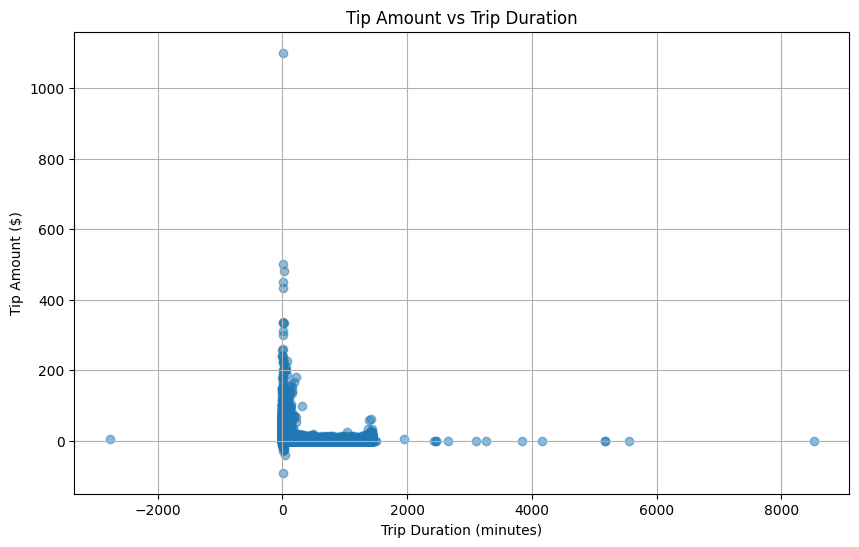

In [74]:
#Trip Duration vs Tip Amount
# Calculate trip duration in minutes
Jan2020['trip_duration_s'] = (Jan2020['tpep_dropoff_datetime'] - Jan2020['tpep_pickup_datetime']).dt.total_seconds() / 60

# Plot tip amount vs trip duration
plt.figure(figsize=(10, 6))
plt.scatter(Jan2020['trip_duration_s'], Jan2020['tip_amount'], alpha=0.5)
plt.title('Tip Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()


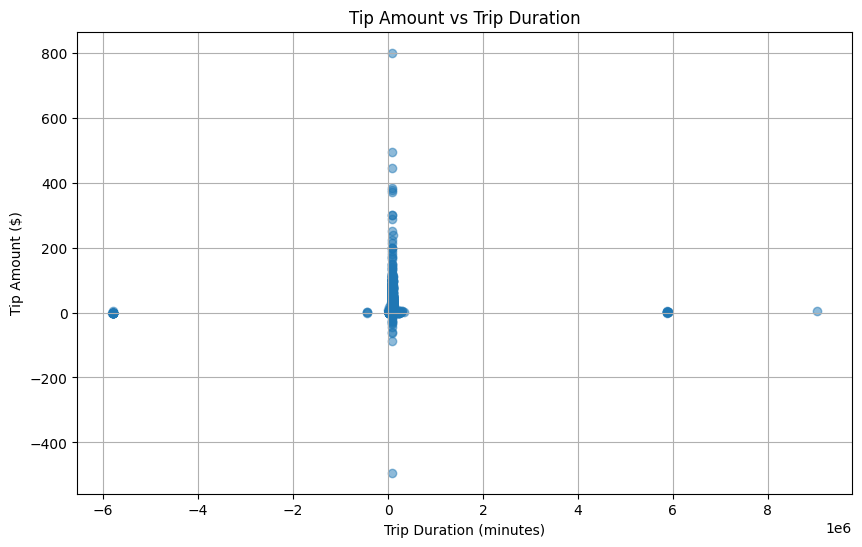

In [75]:
# Calculate trip duration in minutes
Mar2020['trip_duration_s'] = (Mar2020['tpep_dropoff_datetime'] - Jan2020['tpep_pickup_datetime']).dt.total_seconds() / 60

# Plot tip amount vs trip duration
plt.figure(figsize=(10, 6))
plt.scatter(Mar2020['trip_duration_s'], Mar2020['tip_amount'], alpha=0.5)
plt.title('Tip Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

Text(0.5, 0.92, 'Trip Duration vs Tip Amount vs Trip Distance')

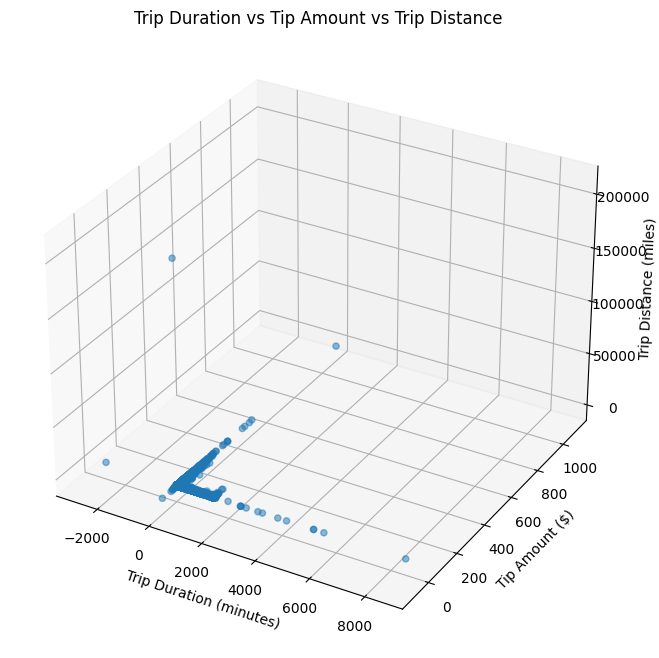

In [76]:
from mpl_toolkits.mplot3d import Axes3D

# Plot trip duration vs tip amount vs trip distance
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Jan2020['trip_duration_s'], Jan2020['tip_amount'], Jan2020['trip_distance'], alpha=0.5)
ax.set_xlabel('Trip Duration (minutes)')
ax.set_ylabel('Tip Amount ($)')
ax.set_zlabel('Trip Distance (miles)')
ax.set_title('Trip Duration vs Tip Amount vs Trip Distance')


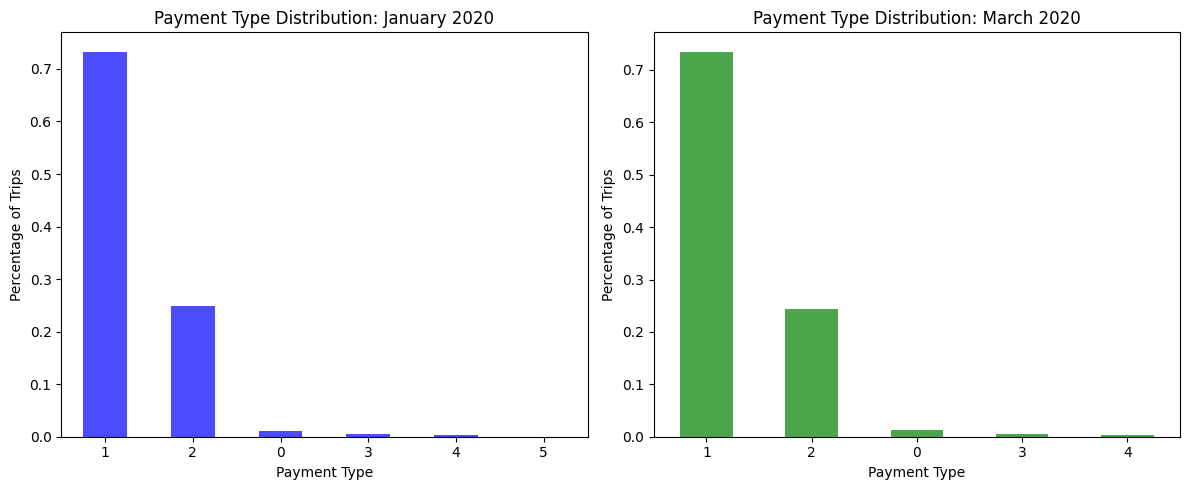

In [77]:
january_payment_distribution = Jan2020['payment_type'].value_counts(normalize=True)
march_payment_distribution = Mar2020['payment_type'].value_counts(normalize=True)

# Payment type distribution for January 2020
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
january_payment_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Trips')
plt.title('Payment Type Distribution: January 2020')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Payment type distribution for March 2020
plt.subplot(1, 2, 2)
march_payment_distribution.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Trips')
plt.title('Payment Type Distribution: March 2020')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#1= Credit card
#2= Cash
#3= No charge
#4= Dispute
#5= Unknown
#6= Voided trip

Conclusion:

Total number of trips are more in January. People travelled in taxis more.

It is also the case that the shorter/faster the trips, the more tip was given to the driver.

The Number of Passengers in a Jan for a ride was slightly higher. Passengers preferred travelling alone from March.

Longer Distance trips were more in January.

Credit card remained the top payment method in both the months

